# Visualizing Tweet Sentiment with Word Clouds

#### Data is from:

https://www.kaggle.com/kazanova/sentiment140/downloads/sentiment140.zip/2


Type a little story about what you did, what was difficult, and what you learned.

In [1]:
#Get directory path
import os
os.chdir('/Users/Yrelav/Documents/Cognizant/Training/Gen_C_Instruction/NLP') 
os.getcwd( )

'C:\\Users\\Yrelav\\Documents\\Cognizant\\Training\\Gen_C_Instruction\\NLP'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Read in the data
columns = ['label', 'id', 'ds', 'flag', 'user', 'tweet']
df = pd.read_csv('Tweets_sentiment1.csv', names=columns)
print(df.shape)
print(df.columns)
df.dtypes

(785642, 6)
Index(['label', 'id', 'ds', 'flag', 'user', 'tweet'], dtype='object')


label     int64
id        int64
ds       object
flag     object
user     object
tweet    object
dtype: object

### Check the structure of the tweet column

In [3]:
df.head()

,label,id,ds,flag,user,tweet
0,0,2058621488,Sat Jun 06 15:18:09 PDT 2009,NO_QUERY,sweeneylove,despises the fact that she will not be able to...
1,0,2058621578,Sat Jun 06 15:18:10 PDT 2009,NO_QUERY,fernando_garcia,OMG!! Dulce Maria deleted her Twitter!!!
2,0,2058621741,Sat Jun 06 15:18:11 PDT 2009,NO_QUERY,DWsRoseC,@starbucksapron got my &quot;friend&quot; visi...
3,0,2058621788,Sat Jun 06 15:18:12 PDT 2009,NO_QUERY,valoreetravels,@princessjoya The place you used to work with ...
4,0,2058621991,Sat Jun 06 15:18:13 PDT 2009,NO_QUERY,meghanledger,"@missemilymac AHHHHH!!!! That sucks! So, are ..."


In [4]:
#Create some missing values to predict
df['label_pred'] = df.apply(lambda _: '', axis=1)

df['label_pred'] = np.where((df['ds'].str.contains('Jun 06 15')) & (df['label'] == 0) , 0,np.nan)
df.loc[(df['ds'].str.contains('Jun 03 05')) & (df['label'] == 4), 'label_pred'] = 4


df['label_pred'].value_counts()

4.0    2731
0.0    1458
Name: label_pred, dtype: int64

Above we can see that our new column, 'label_pred', only has a few thousand labeled values. This is much more likely if humans hand-label the data. Techniques are being developed to automatically label data, but most datasets will be human labeled. Getting good training sets is the challenge for machine learning. Bigger is better! But really big training sets take a lot of memory to process and visualize.

In [5]:
#df.to_csv('sentiment_training.csv')
df.tail()

,label,id,ds,flag,user,tweet,label_pred
785637,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,NaN
785638,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,NaN
785639,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,NaN
785640,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,NaN
785641,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...,NaN


#### Tweets contain urls amd @ statements, let's check how many.

In [6]:
df_co = df['tweet'].loc[df['tweet'].str.contains("@")]
print(df_co.shape)
df_co.head()


(368546,)


2     @starbucksapron got my &quot;friend&quot; visi...
3     @princessjoya The place you used to work with ...
4     @missemilymac AHHHHH!!!!  That sucks! So, are ...
6                                       @gimp01 me too 
10    @MizzBizznizz ah shit don't tell me that I'm o...
Name: tweet, dtype: object

In [7]:
df_co2 = df['tweet'].loc[df['tweet'].str.contains("http")]
print(df_co2.shape)
df_co2.head()

(35040,)


16    Re: Drew's Sub. No bike....  View: http://bit....
28    Havn't watched this video for ages, I'm in tea...
32     sad to work tonight - BUT happy i did 30 min ...
72     Help me figure it out  http://tinyurl.com/lx9ad7
77    http://twitpic.com/6s3mb - ash and me, sad the...
Name: tweet, dtype: object

## Preprocessing

In [8]:
import re
#Define a function to clean the text
def clean_text(text):
    text = text.lower()
    text = re.sub(r"@\S+", " ", text)
    text = re.sub(r"http://\S+", " ", text)
    text = re.sub(r"https://\S+", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub(r"co", " ", text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

#Clean the text
df['tweet'] = df['tweet'].map(lambda com : clean_text(com))


#### What is a lambda function?

https://www.python-course.eu/lambda.php

#### Example

r = map(func, seq)

The first argument func is the name of a function and the second a sequence (e.g. a list) seq. map() applies the function func to all the elements of the sequence seq. It returns a new list with the elements changed by func


In [9]:
#This let's us count how many are left.
df_clean = df['tweet'].loc[df['tweet'].str.contains('http')]
print(df_clean.shape)
df_clean.head()

(42,)


18448     why is the https function for itweet not working
22765    2 weeks ago as his twitter ac unt was hacked u...
26650    https twitter ntinues to be broken for me flaw...
36469    damit i have done something wrong but i cant f...
40773    t t irf teaparty teapartyprotest i though ther...
Name: tweet, dtype: object

In [10]:
df.tail()

,label,id,ds,flag,user,tweet,label_pred
785637,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,just woke up having no school is the best feel...,NaN
785638,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,thewdb m very ol to hear old walt interviews â,NaN
785639,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,are you ready for your mojo makeover ask me fo...,NaN
785640,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,happy 38th birthday to my boo of alll time tup...,NaN
785641,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy charitytuesday,NaN


### Create a table to examine the distribution of tags

In [11]:
#Check the shape of the training set
df_training = df[df['label_pred'].notnull()]
print(df_training.shape)

(4189, 7)


### Check distribution of words in the tweets

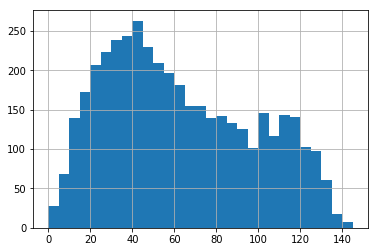

In [12]:
#Create a histogram to see the distribution of the words in the tweets

lens = df_training['tweet'].str.len()
lens.hist(bins = np.arange(0,150,5))

## Featurize the data

https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/

Here we are using CountVectorizer so that we can make the cumulative distribution function below. This is NOT the same as featurizing before running classification algorithms. Follow the example from the ARticles notebook.


In [13]:
#Here we use CountVectorizer to create a dataframe with the featurized text for use in the next plot.

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
cv_fit=cv.fit_transform(df_training['tweet'])

cv_fit.shape

(4189, 7907)

### Visualize the data

#### Use a cumulative distribution function to determine the minimum and maximum words needed to capture the variation in the data


In [14]:
words = cv_fit.toarray()
words = words.astype(dtype=bool)
numlist = [0]*len(words[0])
for word in words:
    numlist += word
print(numlist[1:100])
type(numlist)

[ 5  1  1  1  1  1  1 23  5  2  1  1  3  1  6  2  6  1  1  1  1  2  1  1
  1  1  3  9  1  1  3  2  1  3  1  2  1  4  1  1  2  1  1  1  1  1  1 10
  8  3  1  1  3  2  4  2  1  1  2  1  1  1  1  1  1  2  4  3  1  1  1  2
  1  1  5  1  1  1  3  2  1  1  3  2  1  1  2 14  1  1  2  1  1  1  1  1
  1  1  1]


numpy.ndarray

In [15]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

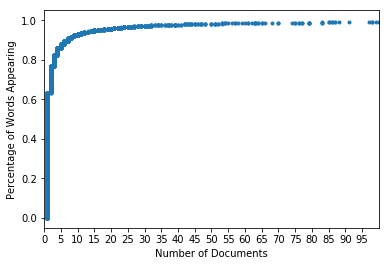

In [16]:
# Compute ECDF 
x, y = ecdf(numlist)

# Generate plot
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.rcParams["figure.figsize"] = [10,5]

# Label the axes
_ = plt.xlim(0,100)
_ = plt.xticks(np.arange(0, 100, step=5))
_ = plt.xlabel('Number of Documents')
_ = plt.ylabel('Percentage of Words Appearing')
plt.savefig('ecdf_tweets.png')

# Display the plot
plt.show()


#### Figure 1. ECDF for tweets in the corpus.

This graph shows that most of words are found within the first 25 tweets. We can set the df_min = 1 and the df_max = 15

## Visualize with a word cloud all of the tweets

In [17]:
# Start with loading all necessary libraries
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [32]:
# Make text for all tweets
text = list(df_training['tweet'].values)

summary1 = []
for i in range(len(text)):
    summary = ' '.join(str(x) for x in text)
    summary1.append(summary) 
alltext = summary1[0] 

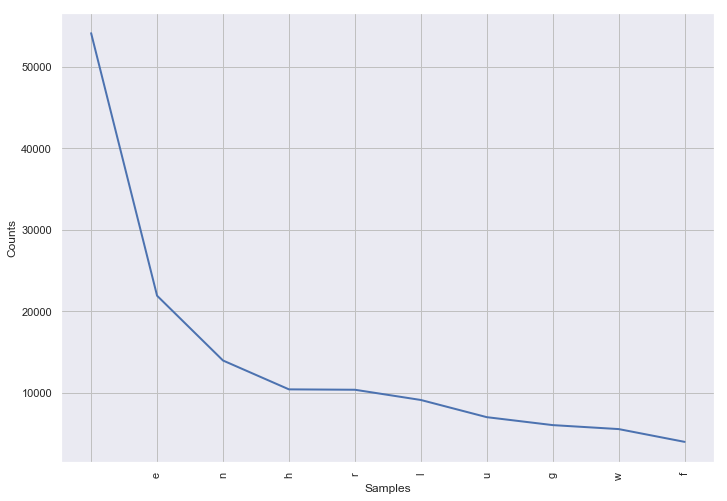

In [37]:
import nltk
from nltk.corpus import stopwords

sw = nltk.corpus.stopwords.words('english')
words_ns = []

for word in alltext:
    if word not in sw:
        words_ns.append(word)
        
sns.set(rc={'figure.figsize':(11.7, 8.27)})
sns.set_style('darkgrid')

nlp_words = nltk.FreqDist(words_ns)
nlp_words.plot(10)

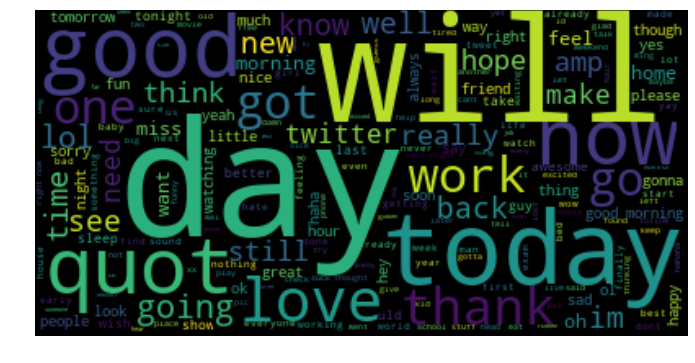

In [21]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(alltext)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
# Save the image in the img folder:
#wordcloud.to_file('/Users/valery/Documents/Springboard/Capstone 2/racecloud.png')
plt.show()

#### Fig 2. Word cloud for all the tweets.

### Vizualize with word clouds for each category: Positive, Negative, Neutral

In [ ]:
# Make text for each category tweets
df_pos = df_training[df_training['label_pred'] == 4]
df_neg = df_training[df_training['label_pred'] == 0]

text_pos = list(df_pos['tweet'].values)
text_neg = list(df_neg['tweet'].values)



In [ ]:
#Positive tweets
summary_pos = []
for i in range(len(text_pos)):
    summary = ' '.join(str(x) for x in text_pos)
    summary_pos.append(summary) 
alltext_pos = summary_pos[0] 


In [ ]:
#Negative tweets
summary_neg = []
for i in range(len(text_neg)):
    summary = ' '.join(str(x) for x in text_neg)
    summary_neg.append(summary) 
alltext_neg = summary_neg[0] 


In [ ]:
# Create and generate a word cloud image for positive tweets:
wordcloud = WordCloud().generate(alltext_pos)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
# Save the image in the img folder:
#wordcloud.to_file('/Users/valery/Documents/Springboard/Capstone 2/racecloud_pos.png')

plt.show()

#### Fig 3. Word cloud for positive tweets.

Note that many of the swear words are missing. Positive words such as "beautiful", "happy", "thank" and "good" are present. 

In [ ]:
# Create and generate a word cloud image for negative tweets:
wordcloud = WordCloud().generate(alltext_neg)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
# Save the image in the img folder:
#wordcloud.to_file('/Users/valery/Documents/Springboard/Capstone 2/racecloud_neg.png')

plt.show()

#### Fig 4. Word cloud for negative tweets.
 

### Construct a sparse matrix of tags for training set and testing set

In [ ]:
df_training.columns

In [ ]:
#Create a df for the tags
df_tags = pd.DataFrame(columns = ['positive', 'negative'])

#Join with the training and testing dfs: df_train and df_test
df_train = pd.concat([df_training, df_tags], axis=1, sort=False)

#Fill missing values with zero (0)
df_train[['positive', 'negative']]\
= df_train[['positive', 'negative']].fillna(0)

#Drop any text that is empty (keep only if not equal to empty cell)
df_train = df_train[df_train.tweet != '[]']
df_train.head()

In [ ]:
#Since the labels are already integers, we can just do a simple substitution
df_train['positive'] = np.where(df_train['label'] == 4, 1, 0)
df_train['negative'] = np.where(df_train['label'] == 0, 1, 0)

df_train.head()    

### Import packages for preprocessing and classification

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#Import packages for algorithm analysis
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score

#Import algorithm packages.
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


# Part 2:  Classifying Articles: Testing and Tuning

### Vectorize/featurize the data 

https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/

In [ ]:
vectorizer = CountVectorizer(stop_words='english',binary=False,max_df=.4, ngram_range=(1, 1),
                                     min_df=1,strip_accents='unicode',max_features=200)

featurizer = TfidfVectorizer(stop_words='english',binary=False,max_df=.4,min_df=1, max_features=200)

Xv = vectorizer.fit_transform(df_train.tweet)
Xt = featurizer.fit_transform(df_train.tweet)

## Multinomial Naive Bayes

In [ ]:
categories = ['positive', 'negative']

In [ ]:
import warnings
warnings.filterwarnings("ignore")

i=1

vectors = [Xv, Xt]
for vect in vectors:
    
    conmatrxNB = []
    precisionNB = []
    recallNB = []
    f1NB = []

    clf_NB = MultinomialNB()

    alphas = [.00001,.0001, .001, .01, .1, 1, 5, 10, 50]

    # Create hyperparameter options
    hyperparameters = dict(alpha=alphas)

    # Create grid search using 5-fold cross validation
    clf_tune = GridSearchCV(clf_NB, hyperparameters, cv=5, scoring='recall')               


    for category in categories:
        # Fit grid search
        best_model = clf_tune.fit(vect, df_train[category])                
        alpha = best_model.best_estimator_.get_params()['alpha']
    
        clf_tunedNB = MultinomialNB(alpha=alpha)
    
        y_train_pred = cross_val_predict(clf_tunedNB, vect, df_train[category], cv=5)

    
        cmNB = confusion_matrix(df_train[category], y_train_pred)
        conmatrxNB.append(cmNB)
        precNB = precision_score(df_train[category], y_train_pred)    
        precisionNB.append(precNB)
        recNB = recall_score(df_train[category], y_train_pred)
        recallNB.append(recNB)
        fNB = f1_score(df_train[category], y_train_pred)
        f1NB.append(fNB)
        

    
    dictNB = {'Categories':categories, 'Confusion Matrix':conmatrxNB, 'Precision_NB':precisionNB, 
          'Recall_NB':recallNB, 'F1_NB':f1NB}


    df_NB = pd.DataFrame(dictNB) 
    #df_NB.to_csv('Results_NB_HBR.csv')

    if i == 1:
        print('CountVectorizer\n')
        i += 1
    else:
        print('\nTfidfVectorizer')
    
    print(df_NB)

In [ ]:
#Run model with CountVectorizer and get AUC scores

conmatrxNB = []
precisionNB = []
recallNB = []
f1NB = []
aucNB = []
aveprecNB = []

clf_NB = MultinomialNB()

alphas = [.00001,.0001, .001, .01, .1, 1, 5, 10, 50]

# Create hyperparameter options
hyperparameters = dict(alpha=alphas)

# Create grid search using 5-fold cross validation
clf_tune = GridSearchCV(clf_NB, hyperparameters, cv=5, scoring='recall')               


for category in categories:
    # Fit grid search
    best_model = clf_tune.fit(Xv, df_train[category])                
    alpha = best_model.best_estimator_.get_params()['alpha']
    
    clf_tunedNB = MultinomialNB(alpha=alpha)
    
    y_train_pred = cross_val_predict(clf_tunedNB, Xv, df_train[category], cv=5)

    cmNB = confusion_matrix(df_train[category], y_train_pred)
    conmatrxNB.append(cmNB)
    precNB = precision_score(df_train[category], y_train_pred)    
    precisionNB.append(precNB)
    recNB = recall_score(df_train[category], y_train_pred)
    recallNB.append(recNB)
    fNB = f1_score(df_train[category], y_train_pred)
    f1NB.append(fNB)
    
    #Make training and testing data.
    y = df_train[category].values.astype(np.int)
    
    X_train, X_test, y_train, y_test = train_test_split(Xv, y, test_size=0.3)
    
    #Fit the tuned classifier to the training data.
    clf_tunedNB.fit(X_train, y_train)

    #Calculate AUC score with the test set
    y_pred = clf_tunedNB.predict(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    auc_nb = roc_auc_score(y_test, y_pred)
    aucNB.append(auc_nb)
    

dictNB = {'Categories':categories, 'Confusion Matrix':conmatrxNB, 'Precision_NB':precisionNB, 
          'Recall_NB':recallNB, 'F1_NB':f1NB, 'auc_NB':aucNB}


df_NB = pd.DataFrame(dictNB) 
#df_NB.to_csv('Results_NB_HBR.csv')
    
df_NB